# Codecademy 'MuscleHub' AB Test Project

Import modules

In [28]:
from codecademySQL import sql_query
import pandas as pd
from matplotlib import pyplot as plt

Examine each provided table

In [29]:
visits = pd.read_csv('visits.csv')
print(visits.head())

  first_name last_name                          email  gender visit_date
0      Karen   Manning        Karen.Manning@gmail.com  female     5-1-17
1    Annette     Boone               AB9982@gmail.com  female     5-1-17
2   Salvador   Merritt  SalvadorMerritt12@outlook.com    male     5-1-17
3     Martha   Maxwell       Martha.Maxwell@gmail.com  female     5-1-17
4      Andre     Mayer         AndreMayer90@gmail.com    male     5-1-17


In [30]:
fitness_tests = pd.read_csv('fitness_tests.csv')
print(fitness_tests.head())

  first_name last_name                   email  gender fitness_test_date
0        Kim    Walter   KimWalter58@gmail.com  female        2017-07-03
1        Tom   Webster        TW3857@gmail.com    male        2017-07-02
2     Marcus     Bauer  Marcus.Bauer@gmail.com    male        2017-07-01
3    Roberta      Best      RB6305@hotmail.com  female        2017-07-02
4     Carrie   Francis      CF1896@hotmail.com  female        2017-07-05


In [31]:
applications = pd.read_csv('applications.csv')
print(applications.head())

  first_name last_name                    email  gender application_date
0        Roy    Abbott    RoyAbbott32@gmail.com    male       2017-08-12
1      Agnes   Acevedo  AgnesAcevedo1@gmail.com  female       2017-09-29
2    Roberta   Acevedo         RA8063@gmail.com  female       2017-09-15
3     Darren    Acosta  DAcosta1996@hotmail.com    male       2017-07-26
4     Vernon    Acosta    VAcosta1975@gmail.com    male       2017-07-14


In [32]:
purchases = pd.read_csv('purchases.csv')
print(purchases.head())

  first_name last_name                    email  gender purchase_date
0        Roy    Abbott    RoyAbbott32@gmail.com    male    2017-08-18
1    Roberta   Acevedo         RA8063@gmail.com  female    2017-09-16
2     Vernon    Acosta    VAcosta1975@gmail.com    male    2017-07-20
3     Darren    Acosta  DAcosta1996@hotmail.com    male    2017-07-27
4       Dawn    Adkins    Dawn.Adkins@gmail.com  female    2017-08-24


Merge all dataframes into one using integrated SQL query

In [33]:
df = sql_query('''
SELECT visits.first_name, visits.last_name, visits.gender, visits.email, visits.visit_date, fitness_tests.fitness_test_date, applications.application_date, purchases.purchase_date FROM visits 
LEFT JOIN fitness_tests ON visits.first_name = fitness_tests.first_name AND visits.last_name = fitness_tests.last_name AND visits.email = fitness_tests.email
LEFT JOIN applications ON visits.first_name = applications.first_name AND visits.last_name = applications.last_name AND visits.email = applications.email
LEFT JOIN purchases ON visits.first_name = purchases.first_name AND visits.last_name = purchases.last_name AND visits.email = purchases.email
WHERE visits.visit_date >= '7-1-17'
''')
print(df.head())

  first_name last_name  gender                   email visit_date  \
0        Kim    Walter  female   KimWalter58@gmail.com     7-1-17   
1        Tom   Webster    male        TW3857@gmail.com     7-1-17   
2     Edward     Bowen    male  Edward.Bowen@gmail.com     7-1-17   
3     Marcus     Bauer    male  Marcus.Bauer@gmail.com     7-1-17   
4    Roberta      Best  female      RB6305@hotmail.com     7-1-17   

  fitness_test_date application_date purchase_date  
0        2017-07-03             None          None  
1        2017-07-02             None          None  
2              None       2017-07-04    2017-07-04  
3        2017-07-01       2017-07-03    2017-07-05  
4        2017-07-02             None          None  


Creating a column called 'ab_test_group' which is 'A' if 'fitness_test_date' is not 'None', and 'B' if 'fitness_test_date' is 'None'.

In [34]:
df['ab_test_group'] = df.fitness_test_date.apply( lambda x: 'A' if pd.notnull(x) else 'B')
print(df.head())

  first_name last_name  gender                   email visit_date  \
0        Kim    Walter  female   KimWalter58@gmail.com     7-1-17   
1        Tom   Webster    male        TW3857@gmail.com     7-1-17   
2     Edward     Bowen    male  Edward.Bowen@gmail.com     7-1-17   
3     Marcus     Bauer    male  Marcus.Bauer@gmail.com     7-1-17   
4    Roberta      Best  female      RB6305@hotmail.com     7-1-17   

  fitness_test_date application_date purchase_date ab_test_group  
0        2017-07-03             None          None             A  
1        2017-07-02             None          None             A  
2              None       2017-07-04    2017-07-04             B  
3        2017-07-01       2017-07-03    2017-07-05             A  
4        2017-07-02             None          None             A  


Count how many users are in each 'ab_test_group'

In [35]:
ab_counts = df.groupby('ab_test_group').email.count().reset_index()
print(ab_counts)

  ab_test_group  email
0             A   2504
1             B   2500


Create a pie cart

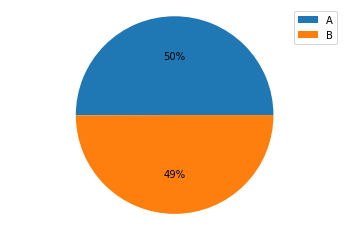

In [36]:
plt.figure()
plt.pie(ab_counts.email, autopct = '%d%%')
plt.axis('equal')
plt.legend(['A', 'B'])


How many people make it to Step 2, filling out an application?

Create a column in 'df' called 'is_application' which is 'Application' if 'application_date' is not 'None' and 'No Application' otherwise

In [37]:
df['is_application'] = df.application_date.apply( lambda x: 'Application' if pd.notnull(x) else 'No Application')
print(df.head())

  first_name last_name  gender                   email visit_date  \
0        Kim    Walter  female   KimWalter58@gmail.com     7-1-17   
1        Tom   Webster    male        TW3857@gmail.com     7-1-17   
2     Edward     Bowen    male  Edward.Bowen@gmail.com     7-1-17   
3     Marcus     Bauer    male  Marcus.Bauer@gmail.com     7-1-17   
4    Roberta      Best  female      RB6305@hotmail.com     7-1-17   

  fitness_test_date application_date purchase_date ab_test_group  \
0        2017-07-03             None          None             A   
1        2017-07-02             None          None             A   
2              None       2017-07-04    2017-07-04             B   
3        2017-07-01       2017-07-03    2017-07-05             A   
4        2017-07-02             None          None             A   

   is_application  
0  No Application  
1  No Application  
2     Application  
3     Application  
4  No Application  


Count how many people from Group A and Group B do or do not pick up an application

In [38]:
app_counts = df.groupby(['ab_test_group', 'is_application']).email.count().reset_index()
print(app_counts)

  ab_test_group  is_application  email
0             A     Application    250
1             A  No Application   2254
2             B     Application    325
3             B  No Application   2175


Pivot 'app_counts' such that:
- The 'index' is 'ab_test_group'
- The 'columns' are 'is_application'

In [39]:
apps_pivot = app_counts.pivot(index = 'ab_test_group', columns = 'is_application', values = 'email').reset_index()
print(apps_pivot)

is_application ab_test_group  Application  No Application
0                          A          250            2254
1                          B          325            2175


Define a new column called `Total`, which is the sum of `Application` and `No Application`.

In [40]:
apps_pivot['Total'] = apps_pivot['Application'] + apps_pivot['No Application']

Calculate another column called `Percent with Application`, which is equal to `Application` divided by `Total`.

In [41]:
apps_pivot['Percent'] = apps_pivot.Application / apps_pivot.Total
print (apps_pivot)

is_application ab_test_group  Application  No Application  Total  Percent
0                          A          250            2254   2504  0.09984
1                          B          325            2175   2500  0.13000


Is there a significant difference in visitors turning in applications between Groups A and B?

Import and perform chi-squared test

In [42]:
from scipy.stats import chi2_contingency
contingency = [[250, 2254], [325, 2175]]
x, pvalue, y, z = chi2_contingency(contingency)
print(pvalue)

0.0009647827600722304


Looks like the difference is significant. p < 0.05 is true. Reject the null. 

Of those who picked up an application, how many purchased a membership?

Add a column to 'df' called 'is_member' which is 'Member' if 'purchase_date' is not 'None', and 'Not Member' otherwise

In [43]:
df['is_member'] = df.purchase_date.apply( lambda x : 'Member' if pd.notnull(x) else 'Not Member')
print(df.head())

  first_name last_name  gender                   email visit_date  \
0        Kim    Walter  female   KimWalter58@gmail.com     7-1-17   
1        Tom   Webster    male        TW3857@gmail.com     7-1-17   
2     Edward     Bowen    male  Edward.Bowen@gmail.com     7-1-17   
3     Marcus     Bauer    male  Marcus.Bauer@gmail.com     7-1-17   
4    Roberta      Best  female      RB6305@hotmail.com     7-1-17   

  fitness_test_date application_date purchase_date ab_test_group  \
0        2017-07-03             None          None             A   
1        2017-07-02             None          None             A   
2              None       2017-07-04    2017-07-04             B   
3        2017-07-01       2017-07-03    2017-07-05             A   
4        2017-07-02             None          None             A   

   is_application   is_member  
0  No Application  Not Member  
1  No Application  Not Member  
2     Application      Member  
3     Application      Member  
4  No Applicatio

Create a dataframe called 'just_apps' the contains only people who picked up an application

In [44]:
just_apps = df[pd.notnull(df.application_date)]
print(just_apps.head())

   first_name last_name  gender                    email visit_date  \
2      Edward     Bowen    male   Edward.Bowen@gmail.com     7-1-17   
3      Marcus     Bauer    male   Marcus.Bauer@gmail.com     7-1-17   
9    Salvador  Cardenas    male  SCardenas1980@gmail.com     7-1-17   
11    Valerie     Munoz  female     VMunoz1998@gmail.com     7-1-17   
35    Michael     Burks    male         MB9820@gmail.com     7-1-17   

   fitness_test_date application_date purchase_date ab_test_group  \
2               None       2017-07-04    2017-07-04             B   
3         2017-07-01       2017-07-03    2017-07-05             A   
9         2017-07-07       2017-07-06          None             A   
11        2017-07-03       2017-07-05    2017-07-06             A   
35              None       2017-07-07    2017-07-13             B   

   is_application   is_member  
2     Application      Member  
3     Application      Member  
9     Application  Not Member  
11    Application      Member 

Count how many people in 'just_apps' are and aren't members from each group

In [45]:
member_counts = just_apps.groupby(['ab_test_group', 'is_member']).email.count().reset_index()
member_pivot = member_counts.pivot(index = 'ab_test_group', columns = 'is_member', values = 'email').reset_index()
member_pivot['Total'] = member_pivot['Member'] + member_pivot['Not Member']
member_pivot['Percent'] = member_pivot['Member'] / member_pivot['Total']
print(member_pivot)

is_member ab_test_group  Member  Not Member  Total   Percent
0                     A     200          50    250  0.800000
1                     B     250          75    325  0.769231


Are applicants significantly more likely to become members if they took a fitness test(Group A)?

Perform a chi-squared test

In [46]:
contingency = [[200, 50], [250, 75]]
x, pvalue, y, z = chi2_contingency(contingency)
print(pvalue)

0.43258646051083327


Looks like there is no significant difference. p < 0.05 is false. Fail to reject null.

Count the percentages of all visitors who became members for each group

In [47]:
final_member_count = df.groupby(['ab_test_group', 'is_member']).email.count().reset_index()
final_member_pivot = final_member_count.pivot(index = 'ab_test_group', columns = 'is_member', values = 'email').reset_index()
final_member_pivot['Total'] = final_member_pivot['Member'] + final_member_pivot['Not Member']
final_member_pivot['Percent'] = final_member_pivot['Member'] / final_member_pivot['Total']
print(final_member_pivot)


is_member ab_test_group  Member  Not Member  Total   Percent
0                     A     200        2304   2504  0.079872
1                     B     250        2250   2500  0.100000


Is there a significant difference between visitors who purchase memberships between Groups A and B?

Perform a chi-squared test

In [48]:
contingency = [[200, 2304], [250, 2250]]
x, pvalue, y, z = chi2_contingency(contingency)
print(pvalue)

0.014724114645783203


Looks like there is a significant difference. p < 0.05 is true. Reject the null.

Create bar charts displaying differences between each test group at each step:
- Percent of visitors who apply
- Percent of applicants who purchase a membership
- Percent of visitors who purchase a membership

Text(0.5, 1.0, 'Pct Visitors that Apply by Test Group')

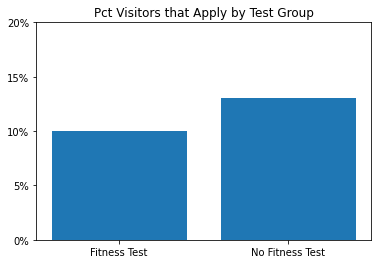

In [49]:
ax = plt.subplot()
plt.bar(range(len(apps_pivot)), apps_pivot.Percent)
ax.set_xticks(range(len(apps_pivot.Percent)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.title('Pct Visitors that Apply by Test Group')

Text(0.5, 1.0, 'Pct from Applicants that Purchase by Test Group')

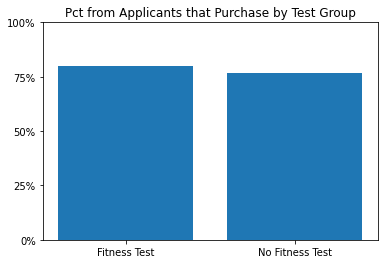

In [50]:
ax = plt.subplot()
plt.bar(range(len(member_pivot)), member_pivot.Percent)
ax.set_xticks(range(len(member_pivot.Percent)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.25, 0.50, 0.75, 1.00])
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
plt.title('Pct from Applicants that Purchase by Test Group')

Text(0.5, 1.0, 'Pct Visitors that Purchase by Test Group')

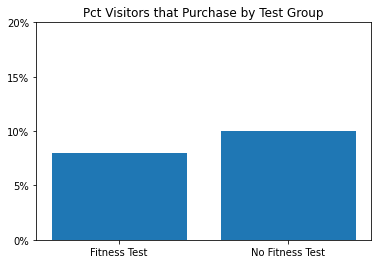

In [51]:
ax = plt.subplot()
plt.bar(range(len(final_member_pivot)), final_member_pivot.Percent)
ax.set_xticks(range(len(final_member_pivot.Percent)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.title('Pct Visitors that Purchase by Test Group')